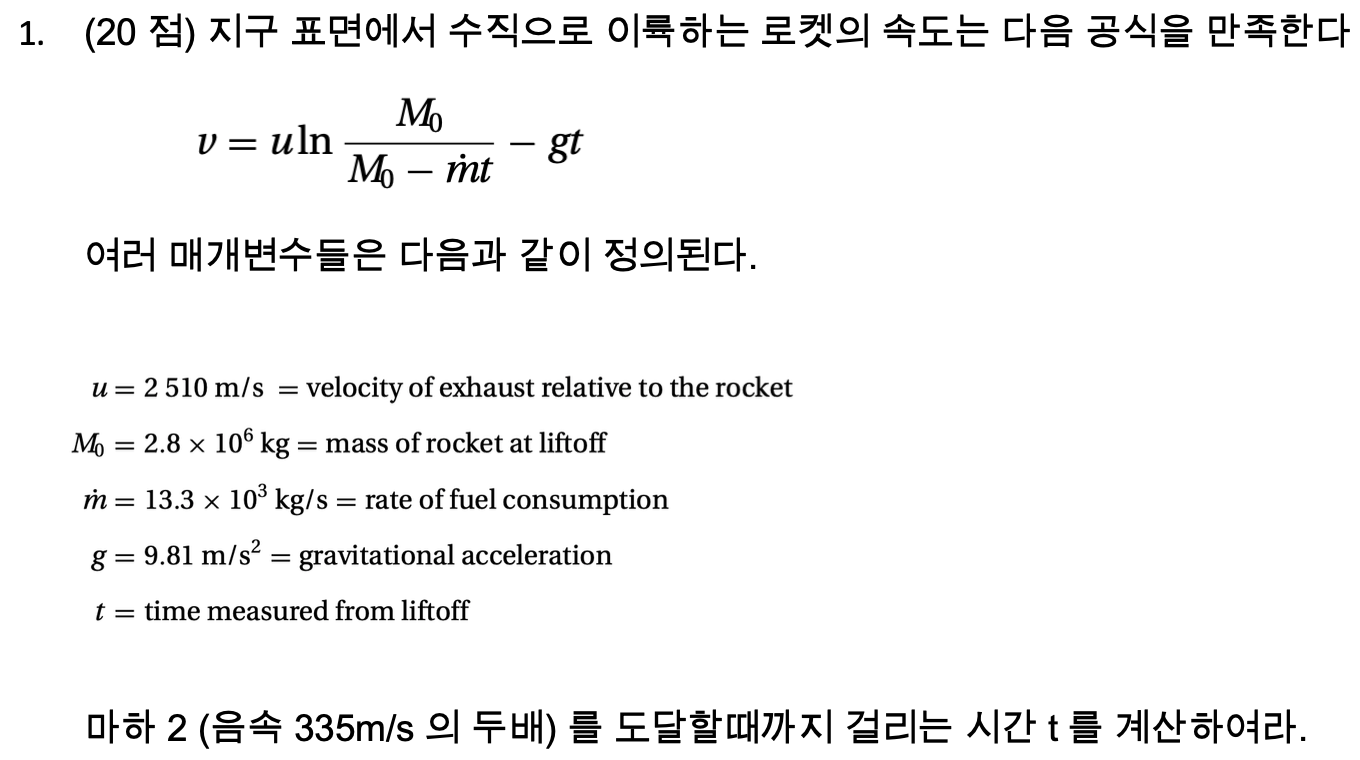

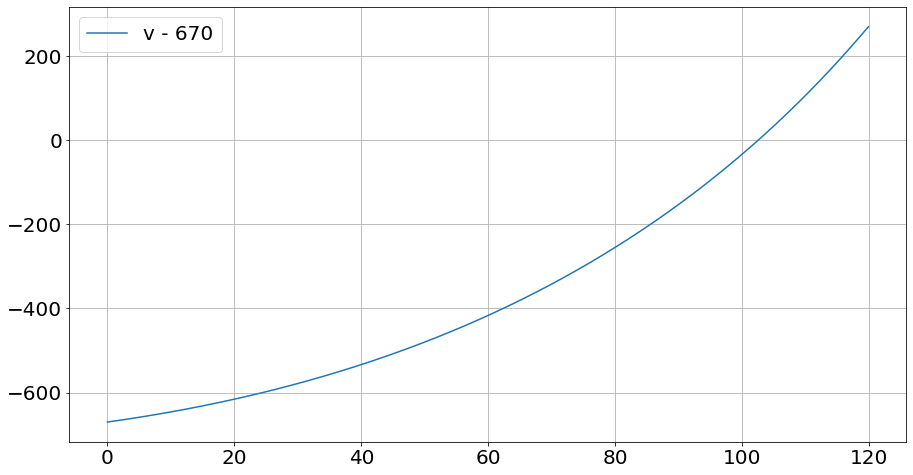

Time v = 670m/s : 102.55681886490883
check result : -2.2737367544323206e-13


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size': 20})

def v(t):
    return u*np.log(M0/(M0-mdot*t)) - g*t - 670.

u = 2510
M0 = 2.8*10**6
mdot = 13.3*10**3
g = 9.81

ans = root_scalar(v,bracket=[100,150],xtol=1.0e-9).root
tt = np.arange(0,120,0.1)
plt.plot(tt,v(tt),label='v - 670')
plt.plot()
plt.grid()
plt.legend()
plt.show()
print('Time v = 670m/s :',ans)
print('check result :',v(ans))

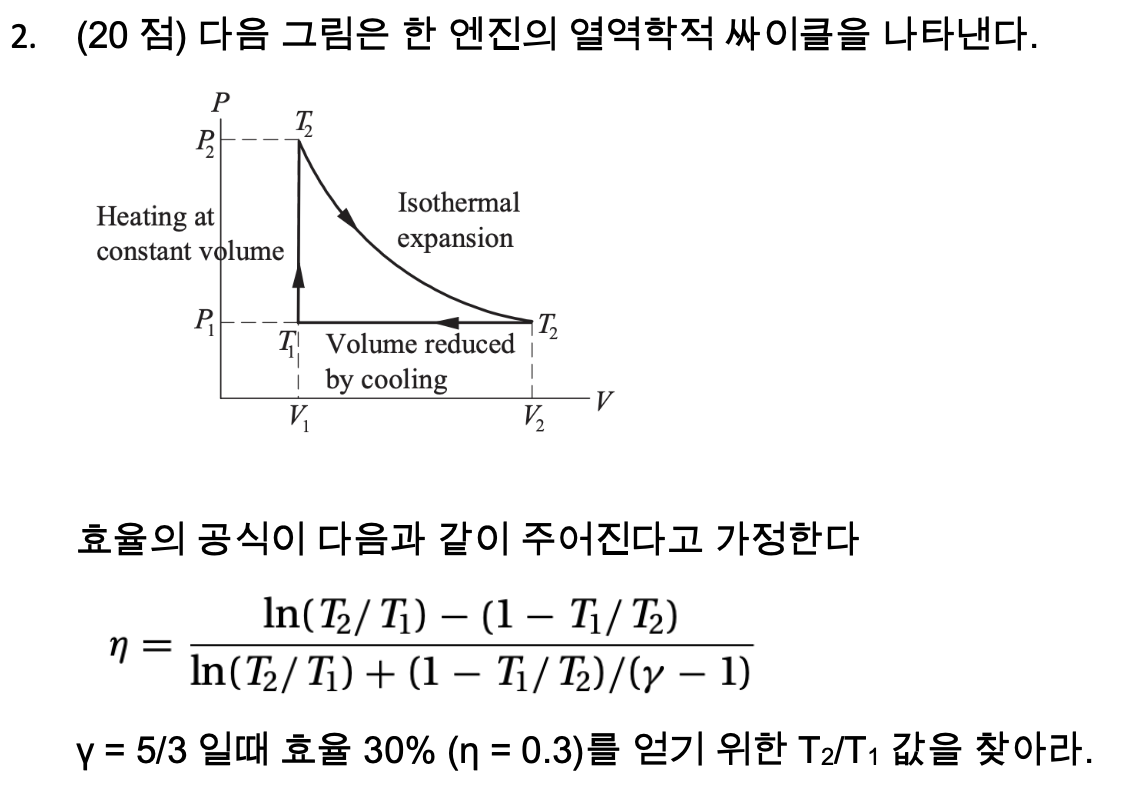

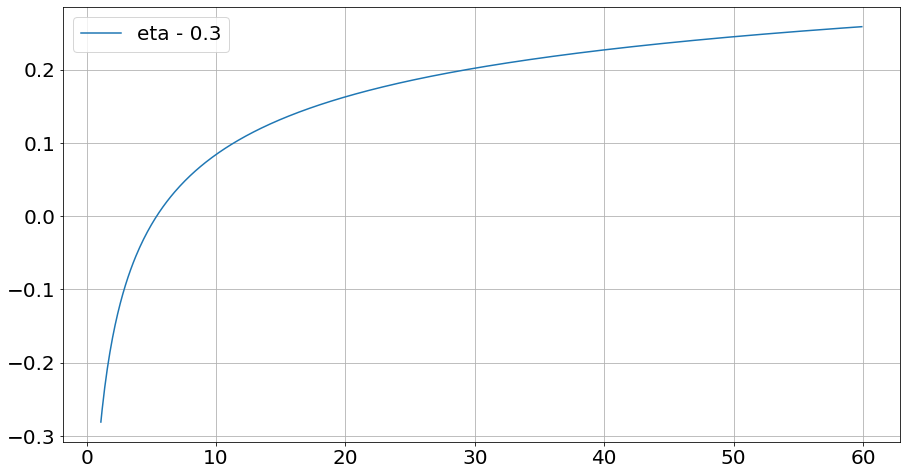

Time eta = 0.3 : 5.412548241639675
check result : 6.596556634264061e-12


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

gamma = 5/3

def eta(t):
    return (np.log(t) - (1 - 1/t))/(np.log(t) + (1 - 1/t)/(gamma - 1)) - 0.3

tt = np.arange(1.1,60,0.1)
plt.plot(tt,eta(tt),label='eta - 0.3')
plt.grid()
plt.legend()
plt.show()
ans = root_scalar(eta,bracket=[2,10],xtol=1.0e-9).root
print('Time eta = 0.3 :',ans)
print('check result :',eta(ans))

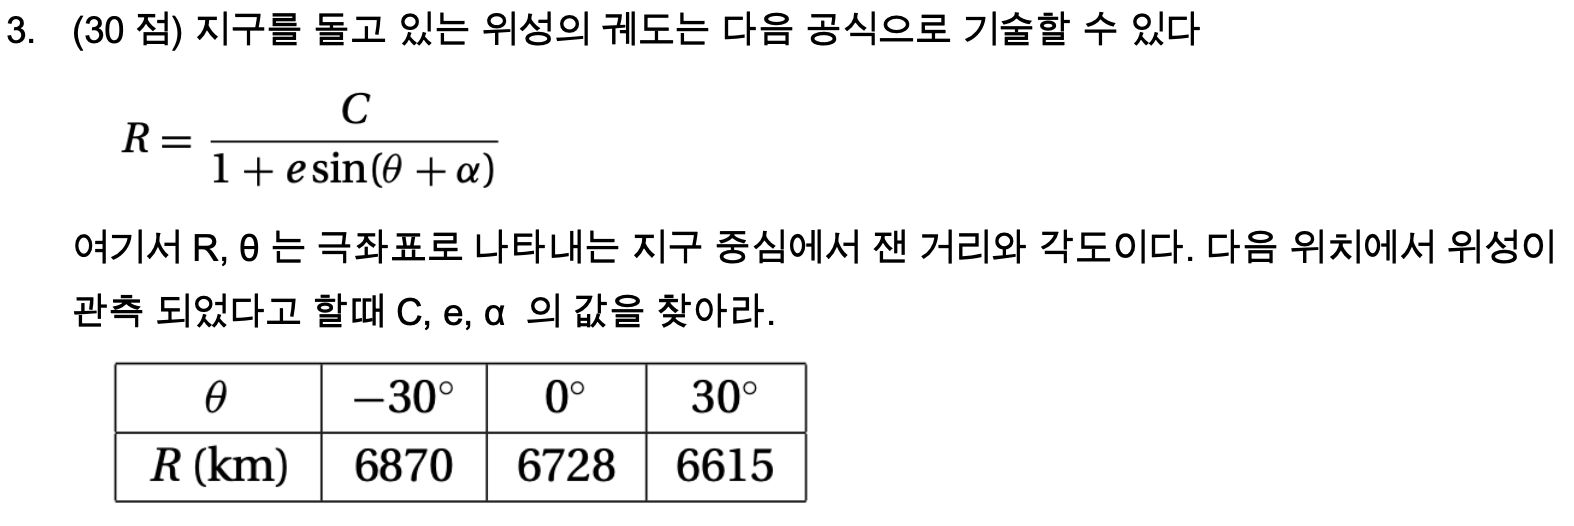

In [63]:
import numpy as np
from scipy.optimize import root

def R1(c,e,a):
    return c/(1 + e*np.sin(-30*np.pi/180 + a)) - 6870.

def R2(c,e,a):
    return c/(1 + e*np.sin(0 + a)) - 6728.

def R3(c,e,a):
    return c/(1 + e*np.sin(30*np.pi/180 + a)) - 6615.

def func(x):
    return [R1(x[0],x[1],x[2]),R2(x[0],x[1],x[2]),R3(x[0],x[1],x[2])]

x0 = [7000,-0.0405,-2.8008]
sol = root(func,x0,tol=1e-13)
ans = sol.x
print(f'C = {ans[0]}\ne = {ans[1]}\na = {ans[2]}')
print(f'\ncheck result ->\nR(-30) - 6870 = {func(ans)[0]}\nR(0) - 6728 = {func(ans)[1]}\nR(30) - 6615 = {func(ans)[2]}')

C = 6819.293793207857
e = -0.0405989590577495
a = -2.8008086556394236

check result ->
R(-30) - 6870 = 0.0
R(0) - 6728 = 0.0
R(30) - 6615 = 0.0


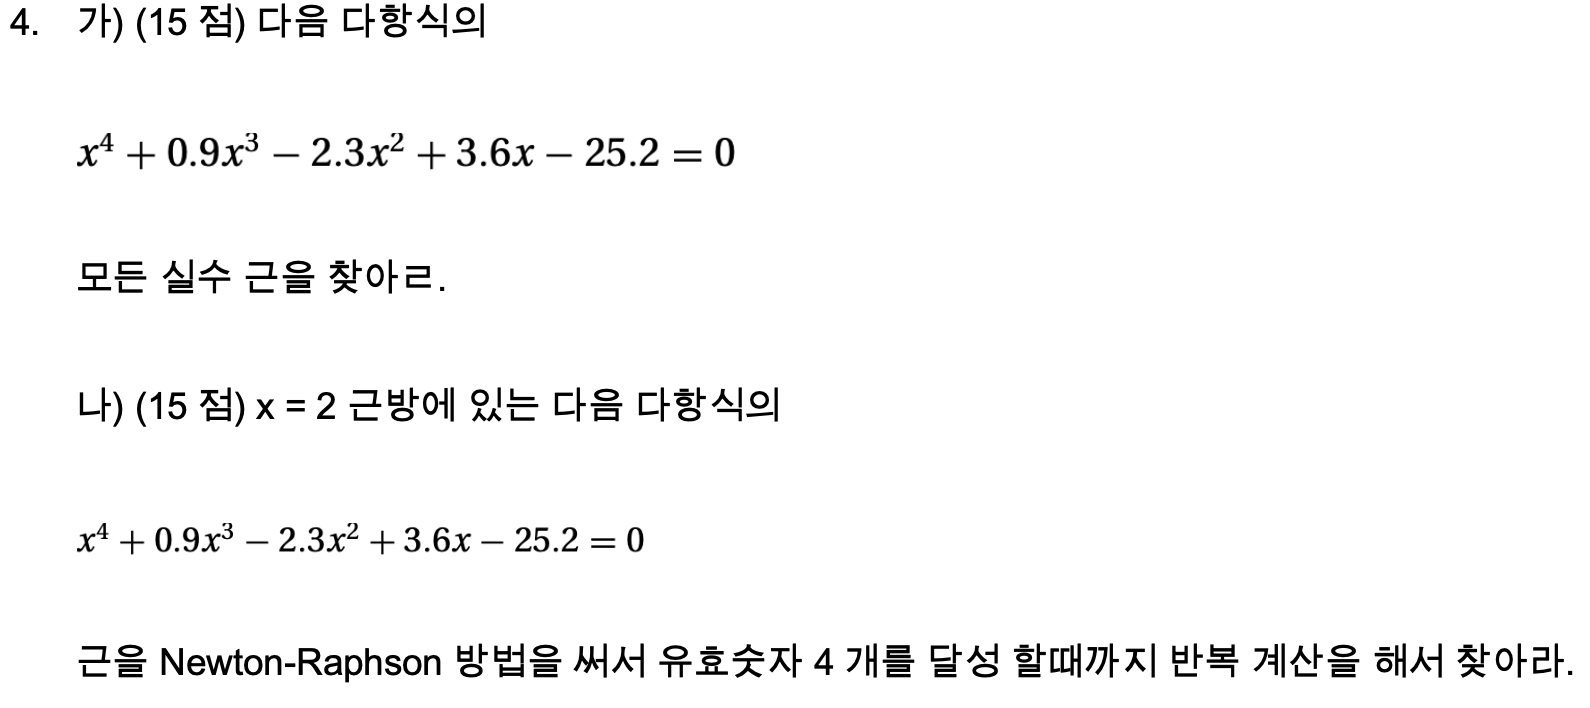

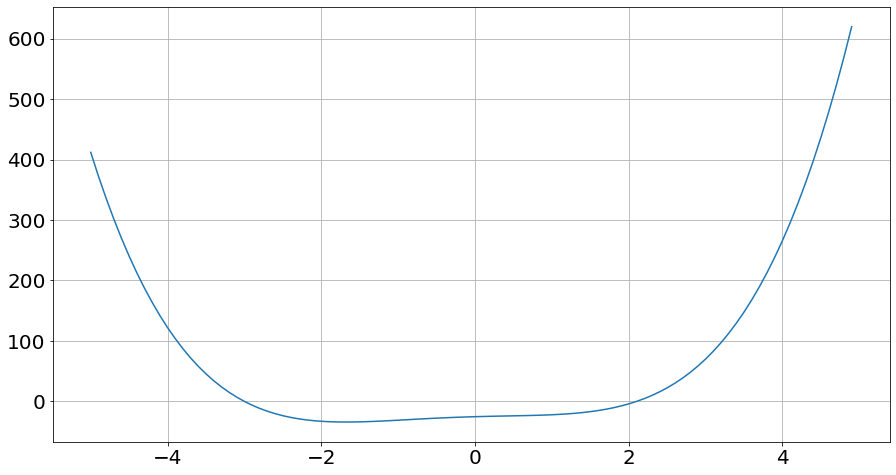

root1 : -3.0000000000480798
root2 : 2.0999999999409558
check result ->
f(root1) : 3.1876901118721435e-09, f(root2) : -2.532466680804646e-09

newton Raphson ->
root1 : -3.0
root2 : 2.1
check result ->
f(root1) : 0.0, f(root2) : 1.0658141036401503e-14


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

def newtonRaphson(f,df,a,b,tol=1.0e-9):
    from numpy import sign
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    if sign(fa) == sign(fb): error.err("Root is not bracketed")
    x = 0.5*(a + b)
    for i in range(30):
        fx = f(x)
        if fx == 0.0: return x
        if sign(fa) != sign(fx): b = x
        else: a = x
        dfx = df(x)
        try: dx = -fx/dfx
        except ZeroDivisionError: dx = b - a
        x = x + dx
        if (b - x)*(x - a) < 0.0:
            dx = 0.5*(b - a)
            x = a + dx
        if abs(dx) < tol*max(abs(b),1.0): return x
    print("Too many iterations in Newton-Raphson")

f = lambda x: x**4 + 0.9*x**3 - 2.3*x**2 + 3.6*x - 25.2
df = lambda x: 4*x**3 + 3*0.9*x**2 - 2*2.3*x + 3.6

ans1 = root_scalar(f,bracket=[-3.5,0],xtol=1.0e-9).root
ans2 = root_scalar(f,bracket=[0,3.5],xtol=1.0e-9).root
nans1 = newtonRaphson(f,df,-4,0,tol=1e-5)
nans2 = newtonRaphson(f,df,0,3.5,tol=1e-5)

xx = np.arange(-5,5,0.1)
plt.plot(xx,f(xx))
plt.plot()
plt.grid()
plt.show()
print(f'root1 : {ans1}\nroot2 : {ans2}')
print(f'check result ->\nf(root1) : {f(ans1)}, f(root2) : {f(ans2)}')
print(f'\nnewton Raphson ->\nroot1 : {nans1}\nroot2 : {nans2}')
print(f'check result ->\nf(root1) : {f(nans1)}, f(root2) : {f(nans2)}')

In [6]:
f = lambda x: x**4 + 0.9*x**3 - 2.3*x**2 + 3.6*x - 25.2
df = lambda x: 4*x**3 + 3*0.9*x**2 - 2*2.3*x + 3.6
def newton(f,df,x):
    return x - f(x)/df(x)  

In [28]:
x = newton(f,df,1.5)

In [43]:
x = newton(f,df,x)
print(x)

2.1


In [ ]:
x = ne